# Homework 3

1. Open the Drosophila Network already provided.

2. Check the various properties of the network:
- Is the network scale free?
- Can you find the important players of the network?

# Loading Packages

In [6]:
# NetworkX
import networkx as nx

# Powerlaw
import powerlaw

# Math
import numpy as np
import pandas as pd

# Plot
%matplotlib inline
import matplotlib.pyplot as plt

# Defaultdict
from collections import defaultdict


# Read Data

In [7]:
df = pd.read_csv('drosophhila_net.csv', delimiter='\t')

# Create Graph

In [8]:
def create_graph(df):
    g = nx.Graph()
    g.add_edges_from(np.array(df.iloc[:, :2]))
    return g

In [9]:
g = create_graph(df)

# Graph Visualization

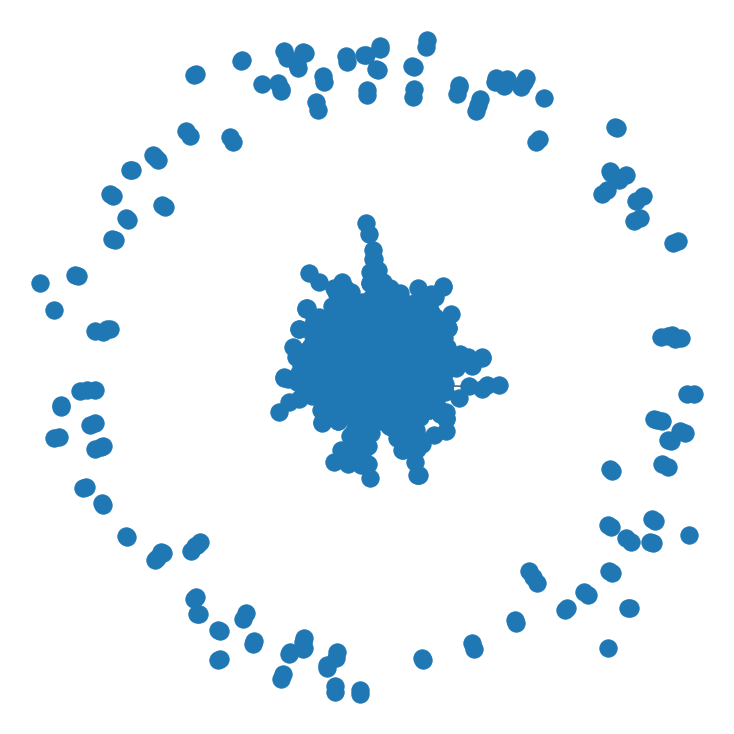

In [10]:
plt.figure(figsize=(10, 10))
nx.draw(g);

# Is the network scale free?

Text(0, 0.5, 'Count')

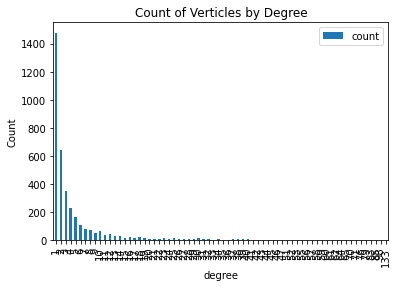

In [11]:
def zero():
    return 0
degrees = defaultdict(zero)
for name, degree in g.degree():
    degrees[degree] += 1
degrees_df = pd.DataFrame([[degree, count] for degree, count in degrees.items()])
degrees_df.columns = ['degree', 'count']
degrees_df = degrees_df.sort_values('degree')
degrees_df.index = degrees_df.degree
degrees_df = degrees_df.drop(columns=['degree'])
degrees_df.plot(kind='bar')
plt.title('Count of Verticles by Degree')
plt.ylabel('Count')

In [12]:
pl = powerlaw.Fit(
    sorted([degree for name, degree in g.degree()]),
    xmin=1,
    discrete=True
)

/home/tomek/Desktop/DEV/venv/lib/python3.8/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /


/home/tomek/Desktop/DEV/venv/lib/python3.8/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /


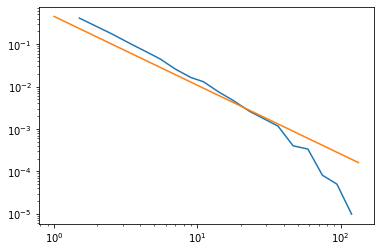

In [13]:
pl.plot_pdf()
pl.power_law.plot_pdf();


We can see that network (blue) line is similar to theoretical (orange) line, so the network is scale free.

# Can you find the important players of the network?

In [14]:
def get_best(G, k=5, rank=nx.algorithms.centrality.degree_centrality):
    """get_best

    """

    ranking = rank(G)

    keys   = np.array(list(ranking.keys()))
    values = np.array(list(ranking.values()))

    return keys[np.argsort(values)[-k:]]

In [15]:
k = 50
degrees_centrality = get_best(g, k=k, rank=nx.algorithms.centrality.degree_centrality)
closeness_centrality = get_best(g, k=k, rank=nx.algorithms.centrality.closeness.closeness_centrality)
betweenness_centrality = get_best(g, k=k, rank=nx.algorithms.centrality.betweenness_centrality)

In [16]:
result = set(degrees_centrality) & set(closeness_centrality) & set(betweenness_centrality)
result

{'FBgn0003479',
 'FBgn0004107',
 'FBgn0010602',
 'FBgn0016131',
 'FBgn0024189',
 'FBgn0025637',
 'FBgn0025674',
 'FBgn0026176',
 'FBgn0027364',
 'FBgn0030400',
 'FBgn0030668',
 'FBgn0031768',
 'FBgn0031957',
 'FBgn0033631',
 'FBgn0034651',
 'FBgn0036257',
 'FBgn0036950',
 'FBgn0037345',
 'FBgn0037382',
 'FBgn0039395',
 'FBgn0039856',
 'FBgn0039858',
 'FBgn0042102',
 'FBgn0259168',
 'FBgn0265998'}

We can find for example intersection of top 50 important players using 3 centrality measures: degrees, closeness and betweenness.

In [17]:
len(result)

25

There are 25 important players returned.